In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import pkg_resources
import aesara.tensor as at
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import math
from util import *
from models import *
from plots import *

# Data

In [2]:
df = load_garcia2022()
df['n2-n1'] = df['n2'] - df['n1']
df['log(n2)'] = np.log(df['n2'])
df['pred'] = None
df['dyn_noise_pred'] = None
df['dyn_noise_mem_pred'] = None

### Look at predictions from Poly Probit model

### Make Efficient Coding Predictions

In [20]:
sns.set_theme(style='white')
df['dyn_noise_pred'] = np.nan
df['dyn_noise_mem_pred'] = np.nan
pred_df = df.groupby('subject').apply(make_dyn_noise_pred_cv)
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')
plt.savefig('opt_dyn_noise_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()
pred_df = pred_df.groupby('subject').apply(make_dyn_noise_mem_pred_cv)
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')
plt.savefig('opt_dyn_noise_mem_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()


grouped = pred_df.groupby(['subject', 'n1', 'n2'])
relplot1 = sns.relplot(grouped.mean().reset_index(), x='n2', y='dyn_noise_pred', hue='n1', kind='line')
plt.savefig('opt_dyn_noise_rel.pdf', dpi=300, bbox_inches='tight')
plt.clf()

relplot2 = sns.relplot(data=grouped.mean().reset_index(), x='n2', y='dyn_noise_mem_pred', hue='n1', kind='line')
plt.savefig('opt_dyn_noise_mem_rel.pdf', dpi=300, bbox_inches='tight')
plt.clf()

/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/util.py:33: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(ss.bernoulli(p).pmf(choices)))
/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_80559/2529006058.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  pred_df = df.groupby('subject').apply(make_dyn_noise_pred_cv)
/Users/maximilianharl/miniforge3/envs/bauer_test/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/max

<Figure size 640x480 with 0 Axes>

<Figure size 572x500 with 0 Axes>

<Figure size 572x500 with 0 Axes>

# Look at predictions for all subjects

In [ ]:
# We do not use this plot.
sns.set_theme(style='white')
fac = sns.FacetGrid(pred_df.loc[:10].groupby(['subject', 'n1', 'n2']).mean().reset_index(), hue='n1', height=5, col='subject', col_wrap=3)

fac.map_dataframe(sns.lineplot, x='n2', y='dyn_noise_pred', color='blue')
fac.map_dataframe(sns.lineplot, x='n2', y='dyn_noise_mem_pred', color='green')
fac.map_dataframe(sns.scatterplot, x='n2', y='choice', color='red')

In [144]:
sns.set_theme(style='white')
fac = sns.FacetGrid(pred_df.groupby(['subject', 'n1', 'n2']).mean().reset_index(), hue='n1', height=5)

fac.map_dataframe(sns.lineplot, x='n2', y='dyn_noise_pred')
fac.map_dataframe(sns.scatterplot, x='n2', y='choice')

plt.xlabel('n2 Value')
plt.ylabel('Scatter: Choice Probability Ground Truth \n Prediction of Dynamic Noise Model')

# Get the unique n1 values as legend labels
legend_labels = [n1 for n1 in pred_df['n1'].unique()]
legend_labels.sort()

# Get the current axes and create a custom legend with n1 values as labels
ax = fac.ax
handles, _ = fac.ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='lower right', title='n1')

plt.savefig('dyn_noise_pred_choice.pdf', dpi=300, bbox_inches='tight')
plt.clf()

/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_80559/3756684937.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.FacetGrid(pred_df.groupby(['subject', 'n1', 'n2']).mean().reset_index(), hue='n1', height=5)


<Figure size 500x500 with 0 Axes>

In [145]:
sns.set_theme(style='white')
fac = sns.FacetGrid(pred_df.groupby(['subject', 'n1', 'n2']).mean().reset_index(), hue='n1', height=5)

# try log scale here.
fac.map_dataframe(sns.lineplot, x='n2', y='dyn_noise_mem_pred')
fac.map_dataframe(sns.scatterplot, x='n2', y='choice')

plt.xlabel('n2 Value')
plt.ylabel('Scatter: Choice Probability Ground Truth \n Prediction of Dynamic Noise Memory Model')

# Get the unique n1 values as legend labels
legend_labels = [n1 for n1 in pred_df['n1'].unique()]
legend_labels.sort()

# Get the current axes and create a custom legend with n1 values as labels
ax = fac.ax
handles, _ = fac.ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='lower right', title='n1')


plt.savefig('dyn_noise_mem_pred_choice.pdf', dpi=300, bbox_inches='tight')
plt.clf()


/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_80559/1021089119.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fac = sns.FacetGrid(pred_df.groupby(['subject', 'n1', 'n2']).mean().reset_index(), hue='n1', height=5)


<Figure size 500x500 with 0 Axes>

## Plot Evaluations

In [6]:
EVAL_DF = pd.DataFrame(index=pd.MultiIndex.from_product([df.reset_index()['subject'].unique(), range(1, 13)], names=['subject', 'params']))

In [11]:
eff_coding_inits = [[3.0],
                    [1e-3, 1.],
                    [1e-3, 1., 2],
                    [1e-3, 1., 2, 1e-3],
                    [1e-3, 1., 2, 1e-3, 1e-5],
                    [1e-3, 1., 2, 1e-3, 1e-5, 1e-8],
                    [1e-3, 1., 2, 1e-3, 1e-5, 1e-8, 1e-8],
                    [1e-3, 1., 2, 1e-3, 1e-3, 1e-8, 1e-8, 1e-8]]

eff_coding_indiv_inits = [[3.0, 3.0],
                          [1e-3, 1., 1e-3, 1.],
                          [1e-3, 1., 2, 1e-3, 1., 2],
                          [1e-3, 1., 2, 1e-3, 1e-3, 1., 2, 1e-3],
                          [1e-3, 1., 2, 1e-3, 1e-5, 1e-3, 1., 2, 1e-3, 1e-5],
                          [1e-3, 1., 2, 1e-3, 1e-5, 1e-8, 1e-3, 1., 2, 1e-3, 1e-5, 1e-8]]


In [12]:
evaluate_model_cv(fit_dyn_noise, eff_coding_inits, 'dyn_noise', EVAL_DF, df, n_splits=5, type=1)

/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_test_data['subject'] = subj  # Add 'subject' level back to MultiIndex
/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_test_data['subject'] = subj  # Add 'subject' level back to MultiIndex
/Users/max

In [13]:
evaluate_model_cv(fit_dyn_noise_mem, eff_coding_indiv_inits, 'dyn_noise_mem', EVAL_DF, df, n_splits=5, type=2)

/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_test_data['subject'] = subj  # Add 'subject' level back to MultiIndex
/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/models.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_test_data['subject'] = subj  # Add 'subject' level back to MultiIndex
/Users/max

In [14]:
# Save the results to a CSV file
from pathlib import Path
filepath = Path('/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/EVAL_DF_OUT_TEST.csv')
EVAL_DF.to_csv(filepath)

In [15]:
sns.set_theme(style='white')
score = 'dyn_noise_TEST_LL' # or: dyn_noise_TEST_LL or dyn_noise_mem_TEST_LL

lineplot2 = sns.lineplot(EVAL_DF.reset_index(), x='params', y=score, err_style='bars').invert_yaxis()
plt.savefig(score + '_line.pdf', dpi=300, bbox_inches='tight')
plt.clf()

relplot21 = sns.relplot(EVAL_DF.loc[:24], x='params', y=score, kind='line', col='subject', col_wrap=3)
filtered_values = EVAL_DF.loc[:24]['dyn_noise_TEST_LL'].replace([np.inf, -np.inf], np.nan).dropna()
relplot21.set(ylim=(filtered_values.min(), filtered_values.max()))
plt.savefig(score + '_rel[:24].pdf', dpi=300, bbox_inches='tight')
plt.clf()

relplot22 = sns.relplot(EVAL_DF.loc[25:48], x='params', y=score, kind='line', col='subject', col_wrap=3)
filtered_values = EVAL_DF.loc[25:48]['dyn_noise_TEST_LL'].replace([np.inf, -np.inf], np.nan).dropna()
relplot22.set(ylim=(filtered_values.min(), filtered_values.max()))
plt.savefig(score + '_rel[25:48].pdf', dpi=300, bbox_inches='tight')
plt.clf()

relplot23 = sns.relplot(EVAL_DF.loc[49:], x='params', y=score, kind='line', col='subject', col_wrap=3)
filtered_values = EVAL_DF.loc[49:]['dyn_noise_TEST_LL'].replace([np.inf, -np.inf], np.nan).dropna()
relplot22.set(ylim=(filtered_values.min(), filtered_values.max()))
plt.savefig(score + '_rel[49:].pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 1500x4000 with 0 Axes>

<Figure size 1500x4000 with 0 Axes>

<Figure size 1500x3000 with 0 Axes>

In [16]:
# EVAL_DF = pd.read_csv('EVAL_DF_OUT_TEST.csv', index_col=[0,1], skipinitialspace=True)

In [17]:
sns.lineplot(EVAL_DF.reset_index(), x='params', y='dyn_noise_TEST_LL', err_style='bars', color='blue', label='Dynamic Noise Model - Out of Sample LL').invert_yaxis()
sns.lineplot(EVAL_DF.reset_index(), x='params', y='dyn_noise_mem_TEST_LL', err_style='bars', color='green', label='Dynamic Noise Memory Model - Out of Sample LL').invert_yaxis()
plt.ylabel("Out of Sample log-likelihood")
plt.xlabel("No. of Parameters")
plt.legend(loc='lower right')
plt.savefig('model_comp_TEST_LL.pdf', dpi=300, bbox_inches='tight')
plt.clf()


<Figure size 640x480 with 0 Axes>

In [18]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_TEST_LL'] == x['dyn_noise_TEST_LL'].max()]).reset_index('params')

sns.set(style='white')
sns.countplot(x='params', data=grouped, color='blue')
plt.xlabel('No. of Parameters')
plt.ylabel('No. of Subjects with Best Performing Model having \n Polynomial of \'No. of Parameters\' - 1 Degree')
plt.savefig('dyn_noise_histogram_TEST_LL.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [19]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_mem_TEST_LL'] == x['dyn_noise_mem_TEST_LL'].max()]).reset_index('params')

# Create a count plot using Seaborn
sns.set(style='white')
sns.countplot(x='params', data=grouped, color='green')
plt.xlabel('No. of Parameters')
plt.ylabel('No. of Subjects with Best Performing Model having \n 2 Polynomials of (\'No. of Parameters\' \ 2) - 1 \n Degree')
plt.savefig('dyn_noise_mem_histogram_TEST_LL.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

# Investigate Individual subjects

In [190]:
def plot_softplus_poly(pars, xmin=0, xmax=60, ylim=60, color='', axis=plt):
    x = np.linspace(xmin, xmax, 100)
    axis.plot(x, make_softplus_poly(pars)(x), color, alpha=0.5)
    axis.axvline(0.0, c='k', ls='--')
    plt.ylim(-2, ylim)

In [172]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_mem_TEST_LL'] == x['dyn_noise_mem_TEST_LL'].max()])

filtered_df = grouped.xs(6, level='params').droplevel(1)

fig, axs = plt.subplots(2, figsize=(5,10))
for index, row in filtered_df.iterrows():
    n_params = len(row['dyn_noise_mem_opt_params'][0])//2
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][:n_params], xmin=0, xmax=30, ylim=30, color='lime', axis=axs[0])
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][n_params:], xmin=0, xmax=30, ylim=30, color='darkgreen', axis=axs[1])
plt.xlabel('n1 / n2 Value')
axs.flat[0].set(ylabel='Sigma 1')
axs.flat[1].set(ylabel='Sigma 2')



plt.savefig('DNMM_6param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 500x1000 with 0 Axes>

In [183]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_mem_TEST_LL'] == x['dyn_noise_mem_TEST_LL'].max()])

filtered_df = grouped.xs(4, level='params').droplevel(1)
fig, axs = plt.subplots(2, figsize=(5,10))
for index, row in filtered_df.iterrows():
    n_params = len(row['dyn_noise_mem_opt_params'][0])//2
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][:n_params], xmin=0, xmax=30, ylim=30, color='lime', axis=axs[0])
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][n_params:], xmin=0, xmax=30, ylim=30, color='darkgreen', axis=axs[1])
plt.xlabel('n1 / n2 Value')
axs.flat[0].set(ylabel='Sigma 1')
axs.flat[1].set(ylabel='Sigma 2')

plt.savefig('DNMM_4param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 500x1000 with 0 Axes>

In [174]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_mem_TEST_LL'] == x['dyn_noise_mem_TEST_LL'].max()])

fig, axs = plt.subplots(2, figsize=(5,10))
for index, row in grouped.iterrows():
    if len(row['dyn_noise_mem_opt_params']) == 0:
        continue
    n_params = len(row['dyn_noise_mem_opt_params'][0])//2
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][:n_params], xmin=0, xmax=30, ylim=30, color='lime', axis=axs[0])
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][0][n_params:], xmin=0, xmax=30, ylim=30, color='darkgreen', axis=axs[1])
plt.xlabel('n1 / n2 Value')
axs.flat[0].set(xlabel='n1 Value')
axs.flat[1].set(xlabel='n2 Value')
axs.flat[0].set(ylabel='Sigma 1')
axs.flat[1].set(ylabel='Sigma 2')

plt.savefig('DNMM_param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 500x1000 with 0 Axes>

In [192]:
filtered_df = EVAL_DF.xs(4, level='params')
fig, axs = plt.subplots(2, figsize=(5,10))
for index, row in filtered_df.iterrows():
    n_params = len(row['dyn_noise_mem_opt_params'][1])//2
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][1][:n_params], xmin=0, xmax=30, ylim=30, color='lime', axis=axs[0])
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][1][n_params:], xmin=0, xmax=30, ylim=30, color='darkgreen', axis=axs[1])
plt.xlabel('n1 / n2 Value')
axs.flat[0].set(ylabel='Sigma 1')
axs.flat[1].set(ylabel='Sigma 2')

plt.savefig('DNMM_4param_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 500x1000 with 0 Axes>

In [194]:
filtered_df = EVAL_DF.xs(6, level='params')
fig, axs = plt.subplots(2, figsize=(5,10))
for index, row in filtered_df.iterrows():
    n_params = len(row['dyn_noise_mem_opt_params'][1])//2
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][1][:n_params], xmin=0, xmax=30, ylim=30, color='lime', axis=axs[0])
    plot_softplus_poly(row['dyn_noise_mem_opt_params'][1][n_params:], xmin=0, xmax=30, ylim=30, color='darkgreen', axis=axs[1])
plt.xlabel('n1 / n2 Value')
axs.flat[0].set(ylabel='Sigma 1')
axs.flat[1].set(ylabel='Sigma 2')

plt.savefig('DNMM_6param_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 500x1000 with 0 Axes>

In [175]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_TEST_LL'] == x['dyn_noise_TEST_LL'].max()])

filtered_df = grouped.xs(2, level='params').droplevel(1)

for index, row in filtered_df.iterrows():
    if len(row['dyn_noise_opt_params']) == 0:
        continue
    plot_softplus_poly(row['dyn_noise_opt_params'][0], xmin=0, xmax=30, ylim=30, color='blue')
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')

plt.savefig('DNM_2param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [197]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_TEST_LL'] == x['dyn_noise_TEST_LL'].max()]).droplevel(1)

filtered_df = grouped.query('params != 2 and params != 4')


for index, row in filtered_df.iterrows():
    if len(row['dyn_noise_opt_params']) == 0:
        continue
    plot_softplus_poly(row['dyn_noise_opt_params'][0], xmin=0, xmax=30, ylim=30, color='blue')
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')

plt.savefig('DNM_345678param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [176]:
grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_TEST_LL'] == x['dyn_noise_TEST_LL'].max()])

for index, row in grouped.iterrows():
    if len(row['dyn_noise_opt_params']) == 0:
        continue
    plot_softplus_poly(row['dyn_noise_opt_params'][0], xmin=0, xmax=30, ylim=30, color='blue')
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')

plt.savefig('DNM_param_opt_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [193]:
for index, row in EVAL_DF.xs(2, level='params').iterrows():
    if len(row['dyn_noise_opt_params']) == 0:
        continue
    plot_softplus_poly(row['dyn_noise_opt_params'][0], xmin=0, xmax=30, ylim=30, color='blue')
plt.xlabel('n1 / n2 Value')
plt.ylabel('Sigma')

plt.savefig('DNM_2param_sigma.pdf', dpi=300, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

In [57]:
print(df['diffval'].unique())

[ -3  -9  -7  -5  18   8   2   1   5 -37   7  14 -14  -4  13 -12  10 -26
   6 -18   3 -28   4   9  -8 -13 -20 -10 -51  -6  -2  -1]


In [38]:
for subj in filtered_df.reset_index()['subject'].unique():
    plot_softplus_poly(filtered_df[subj]['dyn_noise_opt_params'][0], xmin=0, xmax=30, ylim=30)

print(filtered_df)



grouped = EVAL_DF.groupby('subject').apply(lambda x: x[x['dyn_noise_mem_LL'] == 3])

print(grouped)

Empty DataFrame
Columns: [dyn_noise_BIC, dyn_noise_AIC, dyn_noise_TEST_BIC, dyn_noise_TEST_AIC, dyn_noise_TEST_LL, dyn_noise_LL, dyn_noise_opt_params, dyn_noise_mem_BIC, dyn_noise_mem_AIC, dyn_noise_mem_TEST_BIC, dyn_noise_mem_TEST_AIC, dyn_noise_mem_TEST_LL, dyn_noise_mem_LL, dyn_noise_mem_opt_params]
Index: []


# From here, everything is old and probably does not work anymore.

/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/002.Semester/IDB403/lab/code_repos/sensoryspacemapping/util.py:33: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(ss.bernoulli(p).pmf(choices)))
/Users/maximilianharl/miniforge3/envs/bauer_test/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/maximilianharl/miniforge3/envs/bauer_test/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: overflow encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/var/folders/ds/hcvqyw7n4071bn4f5tj9dtkw0000gn/T/ipykernel_97728/1233324582.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, 

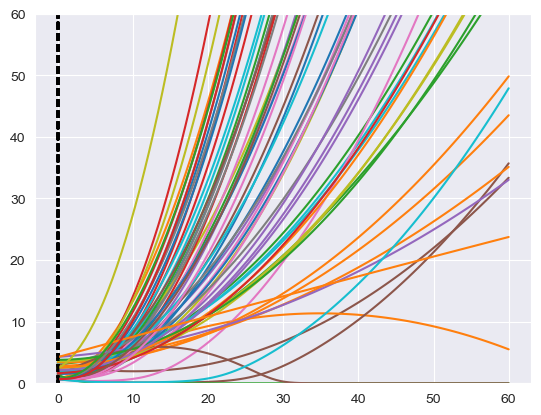

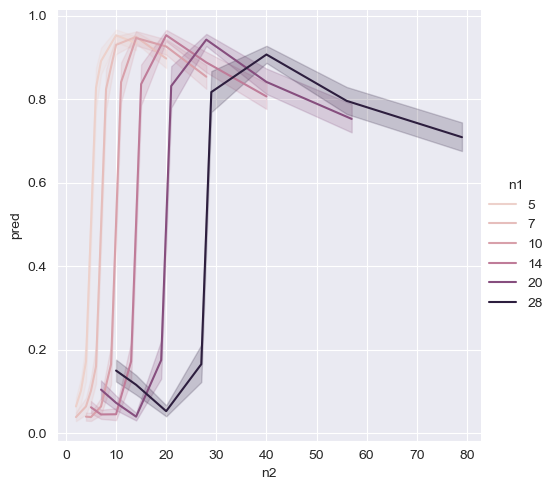

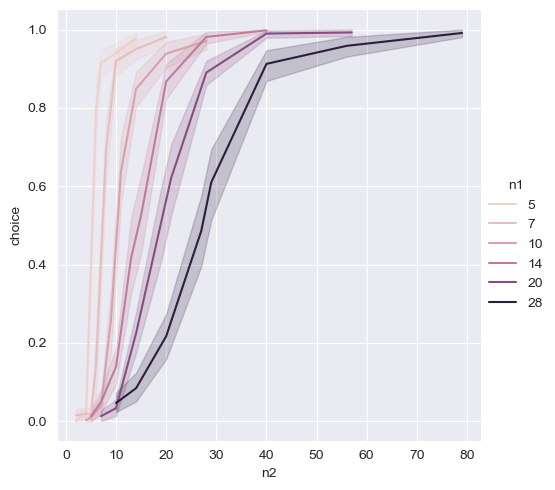

In [6]:
# Look at pred from poly probit model
opt_poly_probit_params = df.groupby('subject').apply(lambda data: make_poly_probid_pred(data))
sns.relplot(opt_poly_probit_params.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='pred', hue='n1', kind='line')
sns.relplot(opt_poly_probit_params.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='choice', hue='n1', kind='line')

In [ ]:
# Make mean preds
opt_mean_params = df.groupby('subject').apply(lambda data: make_mean_pred(data))
sns.relplot(opt_mean_params.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='pred', hue='n1', kind='line')
sns.relplot(opt_mean_params.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='choice', hue='n1', kind='line')

In [ ]:
# make mean var preds
opt_mean_variance_params = df.groupby('subject').apply(make_mean_variance_pred)
sns.relplot(opt_mean_variance_params.groupby(['subject', 'n1', 'n2-n1']).mean().reset_index(), x='n2', y='pred', hue='n1', kind='line')
sns.relplot(opt_mean_variance_params, x='n2', y='pred', hue='n1', kind='line')

In [ ]:
num_samples = 216 # number of trials * number of samples

# Fit and compute BIC for the abs_diff model
poly_probit_params, poly_probit_likelihood = fit_poly_probit(d['n1'], d['n2'], d['choice'], [1e-3, 1., 2]) # the likelihoods are log-likelihoods!!!
print("poly_probit_params: ", poly_probit_params, "poly_probit_likelihood: ", poly_probit_likelihood)
abs_diff_bic = calculate_bic(len(poly_probit_params), num_samples, poly_probit_likelihood)

# Fit and compute BIC for the efficient_coding model
efficient_coding_params, efficient_coding_max_likelihood = fit_efficient_coding(d['n1'], d['n2'], d['choice'], [1e-3, 1., 2])
print("efficient_coding_params: ", efficient_coding_params, "efficient_coding_max_likelihood: ", efficient_coding_max_likelihood)
efficient_coding_bic = calculate_bic(len(efficient_coding_params), num_samples, efficient_coding_max_likelihood)

print("BIC for abs_diff model:", abs_diff_bic)
print("BIC for efficient_coding model:", efficient_coding_bic)

In [ ]:
# this is old and does not work like this
def plot_model_predictions_vs_data(model, model_name, data):
    n1_data = data['n1'].values
    n2_data = data['n2'].values
    choice_data = data['choice'].values

    result = model(data['n1'], data['n2'], data['choice'], np.random.rand(3)*10)
    predicted_choices = get_choice_prob(data['log(n2/n1)'], result[0])

    plt.scatter(data['log(n2/n1)'], predicted_choices, label=model_name, alpha=0.5)
    plt.xlabel('log(n2/n1)')
    plt.ylabel('Predicted Choice Probability')
    plt.legend()
    plt.show()

plot_model_predictions_vs_data(fit_efficient_coding, "Efficient Coding", df)

In [ ]:
models = [
    fit_simple_probit,
    fit_poly_probit,
    fit_abs_diff,
    fit_efficient_coding
]

model_names = [
    'Simple Probit (has only one parameter for one sigma)',
    'Simple Probit with Polynomial Noise (has x parameters for one sigma)',
    'Absolute Difference (has only one parameter for one sigma)',
    'Efficient Coding/Absolute Difference with Sensory Noise (has x parameters for two sigmas)'
]

model_init = [
    [np.random.rand(1)*10],
    [np.random.rand(2)*10, np.random.rand(3)*10, np.random.rand(4)*10],
    [np.random.rand(1)*10],
    [np.random.rand(2)*10, np.random.rand(3)*10, np.random.rand(4)*10]
]

plot_all_models(models, model_names, model_init, df)

In [ ]:

# this is old and does not work anymore like this.
def plot_model_predictions_vs_data(model, model_name, data, subject_id):
    result = model(x1_data, x2_data, choice_data)
    predicted_choices = get_choice_prob(x2_data - x1_data, result)

    plt.scatter(x2_data - x1_data, predicted_choices, label=model_name, alpha=0.5)
    plt.xlabel('x2 - x1')
    plt.ylabel('Predicted Choice Probability')
    plt.title(f'Subject {subject_id}')
    plt.legend()

# Assuming 'data' is the DataFrame containing data for all subjects
unique_subjects = df.index.unique()

# Set up the plot grid based on the number of subjects
n_rows = 4
n_cols = len(unique_subjects) // n_rows + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=True, sharey=True)

sns.set_style("whitegrid")

for idx, subject_id in enumerate(unique_subjects):
    subject_data = df.loc[subject_id]

    plt.sca(axes[idx // n_cols, idx % n_cols])
    plot_model_predictions_vs_data(fit_efficient_coding, "Efficient Coding", subject_data, subject_id)

# Remove any unused subplots
for idx in range(len(unique_subjects), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


In [ ]:

def plot_mean_var(opt_params):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    for params in opt_params:
        print(params)
        # Plot the fitted sigma as a function of x

        x = np.linspace(-7, 7, 100)
        n_params = len(params) // 2
        fitted_sd = make_softplus_poly(params[n_params:])(x)
        fitted_mu = make_poly(params[:n_params])(x)

        axes[0].plot(x, fitted_sd)
        axes[0].axvline(0.0, c='k', ls='--')
        axes[0].set_title("Mean Var model")
        axes[0].set_xlabel('x')
        axes[0].set_ylabel('Fitted sigma')
        axes[0].set_ylim(-20, 50)

        axes[1].plot(x, fitted_mu)
        axes[1].axvline(0.0, c='k', ls='--')
        axes[1].set_title("Mean Mu model")
        axes[1].set_xlabel('x')
        axes[1].set_ylabel('Fitted mu')
        axes[1].set_ylim(-20, 50)

    plt.show()

In [ ]:

def plot_mean(opt_params):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    for params in opt_params:

        params = params
        print(params)
        # Plot the fitted sigma as a function of x

        n_params = len(params) -1
        x = np.linspace(1, 50, 100)
        fitted_mu = make_poly(params[:n_params])(x)
        fitted_sd = make_poly(params[n_params:])(x)

        axes[0].plot(x, fitted_sd)
        axes[0].axvline(0.0, c='k', ls='--')
        axes[0].set_title("Mean Var model")
        axes[0].set_xlabel('x')
        axes[0].set_ylabel('Fitted sigma')
        axes[0].set_ylim(-20, 50)

        axes[1].plot(x, fitted_mu)
        axes[1].axvline(0.0, c='k', ls='--')
        axes[1].set_title("Mean Mu model")
        axes[1].set_xlabel('x')
        axes[1].set_ylabel('Fitted mu')
        #axes[1].set_ylim(-20, 50)

    plt.show()

In [ ]:
def plot_poly_probit(opt_params):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    for params in opt_params:

        print(params)
        x = np.linspace(1, 50, 100)
        fitted_sd = make_poly(params)(x)

        axes[0].plot(x, fitted_sd)
        axes[0].axvline(0.0, c='k', ls='--')
        axes[0].set_title("Mean Var model")
        axes[0].set_xlabel('x')
        axes[0].set_ylabel('Fitted sigma')



    plt.show()

In [ ]:
optimized_params = df.groupby('subject').apply(lambda d: fit_poly_probit(d['n1'], d['n2'], d['choice'], [2.0, 1.0, 1e-3]))
plot_poly_probit(optimized_params)

In [ ]:

def plot_polynomial(model, list_of_fitted_params, x_range):
    x_values = np.linspace(x_range[0], x_range[1], num=500)

    for i, fitted_params in enumerate(list_of_fitted_params):
        if model == fit_poly_probit:
            y_values = softplus_np(make_poly(fitted_params)(x_values))
            plt.plot(x_values, y_values)
        elif model == fit_mean_function:
            y_values = softplus_np(make_poly(fitted_params[:-1])(x_values))
            plt.plot(x_values, y_values)
        elif model == fit_efficient_coding:
            sd1 = softplus_np(make_poly(fitted_params)(x_values))
            plt.plot(x_values, sd1)
        elif model == fit_mean_variance_functions:
            n_params = len(fitted_params) // 2
            mean_y_values = softplus_np(make_poly(fitted_params[:n_params])(x_values))
            var_y_values = softplus_np(make_poly(fitted_params[n_params:])(x_values))
            plt.plot(x_values, mean_y_values)
            plt.plot(x_values, var_y_values)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [ ]:
plot_polynomial(fit_poly_probit, optimized_params, [-20, 50])

In [ ]:
optimized_params = df.groupby('subject').apply(lambda d: fit_mean_variance_functions(d['n1'], d['n2'], d['choice'], np.random.rand(8)*10))

In [ ]:


sns.set(style='white')
sns.relplot(df.groupby(['subject', 'n1', 'diffval']).mean().reset_index(), x='diffval', y='choice', hue='n1', kind='line')
plt.xlim(-10, 10)

In [ ]:
optimized_params

In [ ]:
optimized_params